In [85]:
import pandas as pd

# Use relative path since the CSV is in the same folder as the notebook
file_path = 'event_success_dataset.csv'

# Load and inspect the dataset
df = pd.read_csv(file_path)
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 100 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   total_events               836 non-null    float64
 1   avg_checkins               836 non-null    float64
 2   avg_likes                  836 non-null    float64
 3   avg_event_rating           836 non-null    float64
 4   median_event_rating        836 non-null    float64
 5   venue_popularity_tier      836 non-null    float64
 6   checkin_count              836 non-null    float64
 7   like_count                 836 non-null    float64
 8   rating_avg                 836 non-null    float64
 9   rating_count               836 non-null    float64
 10  success_score_scaled       836 non-null    float64
 11  city_avg_success           836 non-null    float64
 12  city_total_events          836 non-null    float64
 13  city_avg_venue_popularity  836 non-null    float6

(None,
    total_events  avg_checkins  avg_likes  avg_event_rating  \
 0      0.977560      0.741763   0.282260          1.583876   
 1     -1.636414      0.042223  -0.401918         -1.467651   
 2      0.230711     -0.583600  -0.856091         -1.312985   
 3     -1.076277     -0.818588  -1.132872         -0.144552   
 4     -0.142714      1.003452   0.838766          0.527741   
 
    median_event_rating  venue_popularity_tier  checkin_count  like_count  \
 0             1.120445               1.248166       2.051580   -0.907938   
 1            -1.204822              -0.208173       0.289125   -2.217749   
 2            -1.744992              -0.936342       1.548021   -1.693825   
 3            -2.023289              -0.936342       2.806918   -0.122051   
 4             0.898343               1.248166       2.303360    0.270893   
 
    rating_avg  rating_count  ...  city_Aarhus  city_Copenhagen  city_Esbjerg  \
 0   -0.880031      1.278251  ...            0                1     

Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0349 - mae: 0.1502 - val_loss: 0.0141 - val_mae: 0.0930
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mae: 0.1034 - val_loss: 0.0079 - val_mae: 0.0705
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mae: 0.0826 - val_loss: 0.0053 - val_mae: 0.0589
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mae: 0.0755 - val_loss: 0.0056 - val_mae: 0.0598
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mae: 0.0680 - val_loss: 0.0045 - val_mae: 0.0517
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mae: 0.0654 - val_loss: 0.0045 - val_mae: 0.0516
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mae: 0.0646 - val_loss: 0.0036 - val_mae: 0.0462
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mae: 0.0539 - val_loss: 0.0040 - val_mae: 0.0515
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mae: 0.

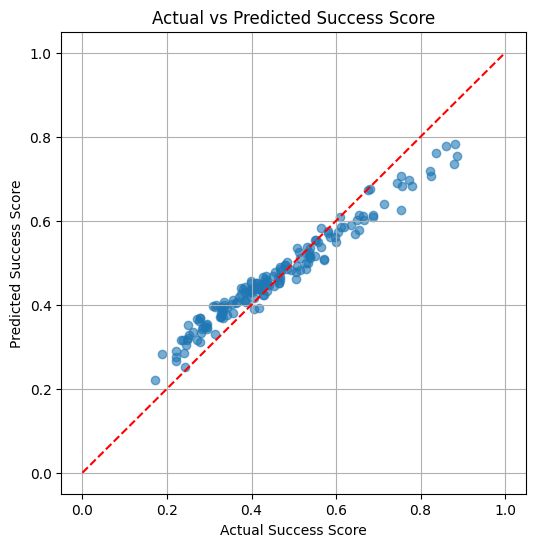

In [86]:
# --- Imports ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- 1. Load data (already done) ---
# df = pd.read_csv("event_success_dataset.csv")

# --- 2. Define X and y ---' \

X = df.drop(columns=["success_score_scaled"])  # all features
y = df["success_score_scaled"]  # target
feature_columns = X.columns.tolist()


# Normalize the target to 0–1
y_min = y.min()
y_max = y.max()
y = (y - y_min) / (y_max - y_min)



# --- 3. Train-test split ---
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 60/20/20


# --- 4. Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 5. Build the model ---
model = Sequential([
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',  # or 'huber_loss'
    metrics=['mae']
)


# --- 6. Train the model ---
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=100, batch_size=32, verbose=1)

# --- 7. Evaluate ---

y_pred = model.predict(X_test_scaled).flatten()

# # Denormalize both predictions and true values
y_pred = y_pred * (y_max - y_min) + y_min
y_test_rescaled = y_test * (y_max - y_min) + y_min


# Evaluate
r2 = r2_score(y_test_rescaled, y_pred)
mae = mean_absolute_error(y_test_rescaled, y_pred)
mse = mean_squared_error(y_test_rescaled, y_pred)

print(f"R²: {r2:.4f}, MAE: {mae:.4f}, MSE: {mse:.4f}")

# --- 8. Plot ---
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rescaled, y_pred, alpha=0.6)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("Actual Success Score")
plt.ylabel("Predicted Success Score")
plt.title("Actual vs Predicted Success Score")
plt.grid(True)
plt.show()



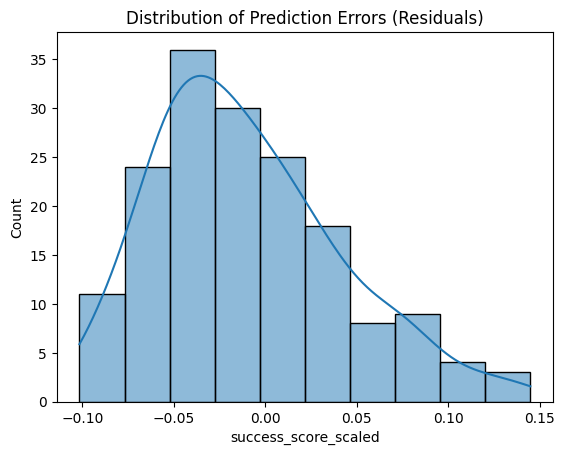

In [87]:
import seaborn as sns
residuals = y_test_rescaled - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors (Residuals)")
plt.show()


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Example using linear model just to test robustness
scores = cross_val_score(LinearRegression(), X, y, scoring='r2', cv=5)
print("R² scores per fold:", scores)
print("Mean R²:", scores.mean())


R² scores per fold: [0.99335858 0.99664878 0.99705294 0.99753374 0.99646101]
Mean R²: 0.9962110117589542


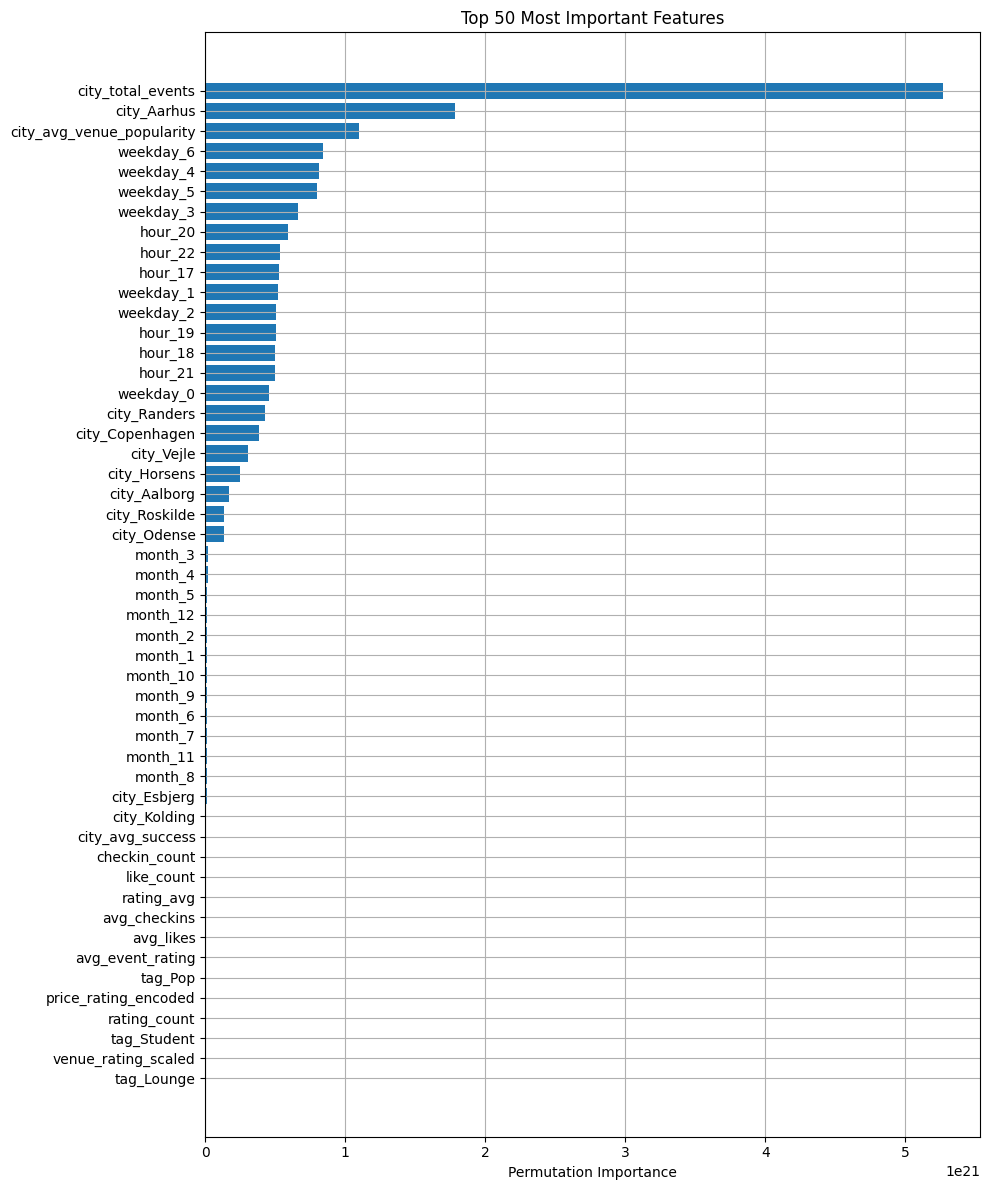

In [89]:
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

# Fit linear model (or reuse one if already trained)
model = LinearRegression()
model.fit(X, y)

# Calculate permutation importances
result = permutation_importance(model, X, y, n_repeats=30, random_state=42)

# Create DataFrame of results
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean
}).sort_values(by='importance', ascending=False)

# Plot top 50 features
top_n = 50
plt.figure(figsize=(10, 12))
plt.barh(importance_df['feature'][:top_n][::-1], importance_df['importance'][:top_n][::-1])
plt.xlabel("Permutation Importance")
plt.title(f"Top {top_n} Most Important Features")
plt.grid(True)
plt.tight_layout()
plt.show()

